In [1]:
# Importamos las librerias relevantes
import pandas as pd
import os


# Convertimos los 12 archivos que tenemos de meses en uno solo


In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("./Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
# Convertimos todo el archivo ya concatenado en un csv para poder ejecutarlo de una forma mas profesional
all_months_data.to_csv("all_data.csv", index = False)

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Limpieza de los datos


In [16]:
# Hay que limpiar los valores NAN
nan_values = all_data[all_data.isna().any(axis=1)]
nan_values

all_data = all_data.dropna(how = "all")



In [23]:
# Buscar los valores "Or" y quitarlos
all_data = all_data[all_data['Order Date'].str[0:2] != "Or"]


In [22]:
# Sacamos una columna exclusivamente para mes
all_data['Month'] = all_data['Order Date'].str[0:2]

# Convertir de string a number
all_data['Month'] = all_data['Month'].astype("int32")



In [44]:
# Convertimos a valores numericos las columnas "Quantity Ordered" y "Price Each"
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data["Sales"] = all_data["Quantity Ordered"] * all_data['Price Each']


### Tarea 4: Agregar una columna de ciudad


In [ ]:
all_data['Purchase Address']

## Cual fue el mejor mes en ventas? Cuanto se consiguio en ventas ese mes?

In [42]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


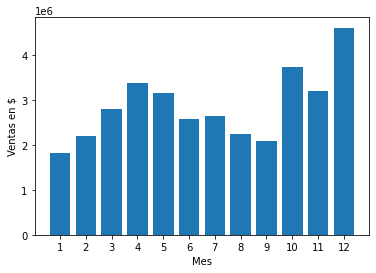

In [43]:
# Importamos matplotlib para mostrar los resultados
import matplotlib.pyplot as plt

months = range(1, 13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel("Mes")
plt.ylabel("Ventas en $")
plt.show()

# Que ciudad tuvo el mayor numero de ventas?